In [1]:
from importlib.metadata import version
import nltk
import tensorflow
import summa
import pandas as pd

print(nltk.__version__)
print(tensorflow.__version__)
print(pd.__version__)
print(version('summa'))

3.9.1
2.10.0
2.2.3
1.2.0


In [2]:
data = pd.read_csv("C:/datasets_temp/news_summary_more.csv", encoding='iso-8859-1')

In [3]:
print(len(data))
data.head()

98401


,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 91
텍스트의 평균 길이 : 58.2385341612382
헤드라인의 최소 길이 : 1
헤드라인의 최대 길이 : 18
헤드라인의 평균 길이 : 9.553906972490116


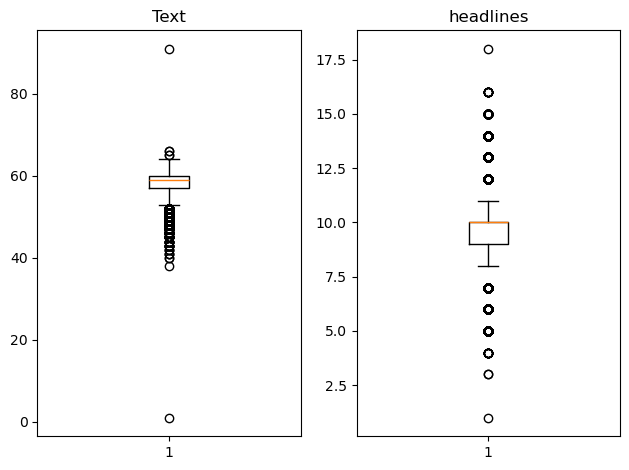

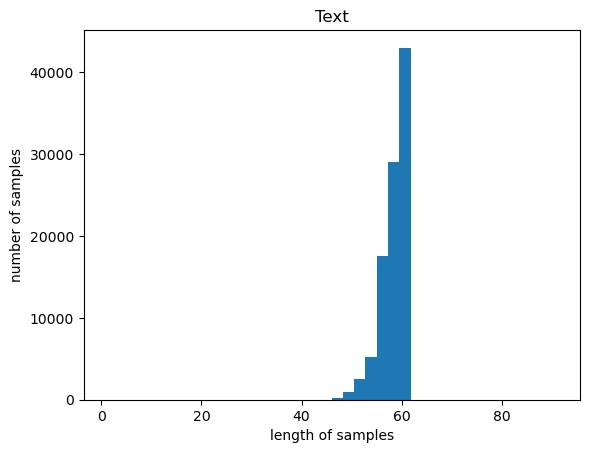

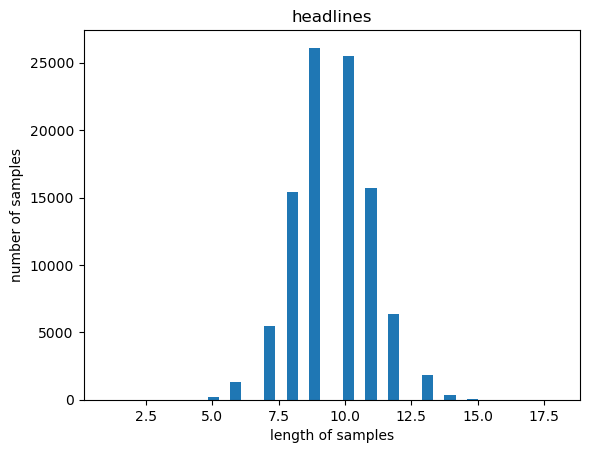

In [4]:
# 길이 분포 출력
import matplotlib.pyplot as plt
import numpy as np 

text_len = [len(s.split()) for s in data['text']]
head_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('헤드라인의 최소 길이 : {}'.format(np.min(head_len)))
print('헤드라인의 최대 길이 : {}'.format(np.max(head_len)))
print('헤드라인의 평균 길이 : {}'.format(np.mean(head_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(head_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(head_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [5]:
#전처리하기:
data.drop_duplicates(subset = ['text'], inplace=True)
data.dropna(axis=0, inplace=True)

## 너무 짧은거
min_text_length = 1
min_headlines_length = 1

filtered_data = data[
    (data['text'].apply(lambda x: len(x.split()) > min_text_length)) &
    (data['headlines'].apply(lambda x: len(x.split()) > min_headlines_length))
]

filtered_data.reset_index(drop=True, inplace=True)

print('전체 샘플수 :', (len(data)))
print('필터링 후 샘플수 :', (len(filtered_data)))
print('제거된 샘플수 :', (len(data) - len(filtered_data)))

전체 샘플수 : 98360
필터링 후 샘플수 : 98359
제거된 샘플수 : 1


In [328]:
temp_data = data[
    (data['text'].apply(lambda x: len(x.split()) > min_text_length)) &
    (data['headlines'].apply(lambda x: len(x.split()) > min_headlines_length))
]

temp_data.reset_index(drop=True, inplace=True)

In [6]:
## 전처리 마저 하기: 추출적 요약 하기 전에 다 제거해버리면 안되니

## 텍스트 정규화

contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [7]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\양자\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# 불용어 사전
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [9]:
# 데이터 전처리 함수
from bs4 import BeautifulSoup
import re

def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (headlines)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [10]:
len(filtered_data[['text']])

98359

In [11]:
filtered_data = filtered_data.reset_index(drop=True)

for i in range(len(filtered_data)):
    filtered_data.loc[i, 'text'] = preprocess_sentence(filtered_data.loc[i, 'text'], remove_stopwords=True)
    if i % 5000 == 0:
        print(i)

clean_text = filtered_data['text']
print("Text 전처리 후 결과: ", clean_text[:5])

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
Text 전처리 후 결과:  0    saurav kant alumnus upgrad iiit pg program mac...
1    kunal shah credit card bill payment platform c...
2    new zealand defeated india wickets fourth odi ...
3    aegon life iterm insurance plan customers enjo...
4    speaking sexual harassment allegations rajkuma...
Name: text, dtype: object


In [12]:
for i in range(len(filtered_data)):
    filtered_data.loc[i, 'headlines'] = preprocess_sentence(filtered_data.loc[i, 'headlines'], remove_stopwords=False)
    if i % 5000 == 0:
        print(i)

clean_headlines = filtered_data['headlines']
print("headlines 전처리 후 결과: ", clean_headlines[:5])

0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
headlines 전처리 후 결과:  0    upgrad learner switches to career in ml al wit...
1    delhi techie wins free food from swiggy for on...
2    new zealand end rohit sharma led india match w...
3    aegon life iterm insurance plan helps customer...
4    have known hirani for yrs what if metoo claims...
Name: headlines, dtype: object


In [13]:
# 빈 샘플 없애기

filtered_data['text'] = clean_text
filtered_data['headlines'] = clean_headlines

# 빈 값을 Null 값으로 변환
filtered_data.replace('', np.nan, inplace=True)
print(filtered_data.isnull().sum())
filtered_data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(filtered_data)))

headlines    0
text         0
dtype: int64
전체 샘플수 : 98359


In [14]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [16]:
max_text_length = 41
max_headlines_length = 11

below_threshold_len(max_text_length, filtered_data['text'])
below_threshold_len(max_headlines_length,  filtered_data['headlines'])

전체 샘플 중 길이가 41 이하인 샘플의 비율: 0.9549609085086266
전체 샘플 중 길이가 11 이하인 샘플의 비율: 0.9449872406185504


텍스트의 최소 길이 : 18
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.10003151719721
헤드라인의 최소 길이 : 3
헤드라인의 최대 길이 : 16
헤드라인의 평균 길이 : 9.299616710214622


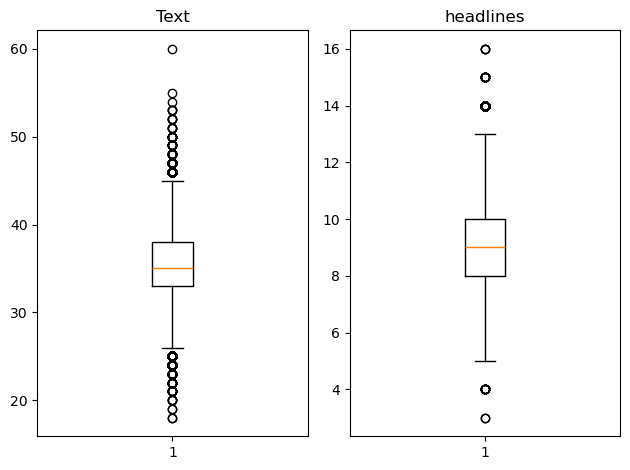

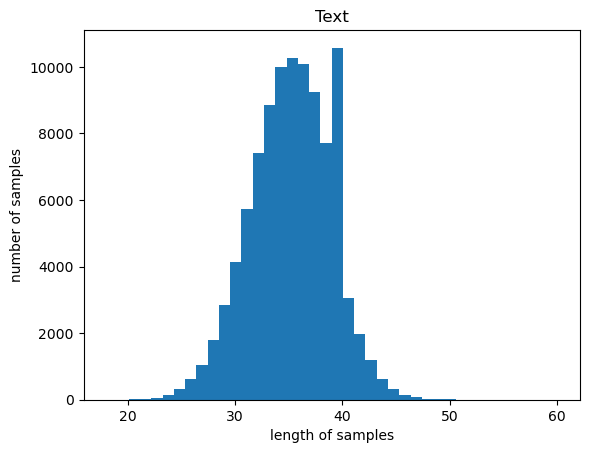

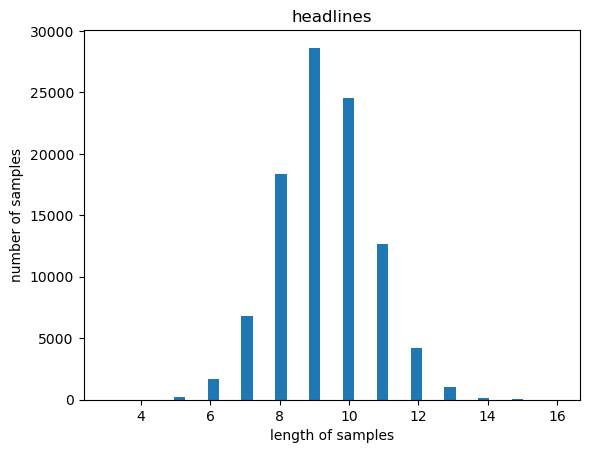

In [17]:
# 길이 분포 출력
import matplotlib.pyplot as plt
import numpy as np 

text_len = [len(s.split()) for s in filtered_data['text']]
head_len = [len(s.split()) for s in filtered_data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('헤드라인의 최소 길이 : {}'.format(np.min(head_len)))
print('헤드라인의 최대 길이 : {}'.format(np.max(head_len)))
print('헤드라인의 평균 길이 : {}'.format(np.mean(head_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(head_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(head_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [18]:
print(len(filtered_data))
filtered_data.head()


98359


,headlines,text
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit pg program mac...
1,delhi techie wins free food from swiggy for on...,kunal shah credit card bill payment platform c...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...
4,have known hirani for yrs what if metoo claims...,speaking sexual harassment allegations rajkuma...


In [22]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
filtered_data = filtered_data.copy()

filtered_data['decoder_input'] = filtered_data['headlines'].apply(lambda x : 'sos '+ x)
filtered_data['decoder_target'] = filtered_data['headlines'].apply(lambda x : x + ' eos')

encoder_input = np.array(filtered_data['text']) # 인코더의 입력
decoder_input = np.array(filtered_data['decoder_input']) # 디코더의 입력
decoder_target = np.array(filtered_data['decoder_target']) # 디코더의 레이블

In [23]:
filtered_data.head()

,headlines,text,decoder_input,decoder_target
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit pg program mac...,sos upgrad learner switches to career in ml al...,upgrad learner switches to career in ml al wit...
1,delhi techie wins free food from swiggy for on...,kunal shah credit card bill payment platform c...,sos delhi techie wins free food from swiggy fo...,delhi techie wins free food from swiggy for on...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sos new zealand end rohit sharma led india mat...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sos aegon life iterm insurance plan helps cust...,aegon life iterm insurance plan helps customer...
4,have known hirani for yrs what if metoo claims...,speaking sexual harassment allegations rajkuma...,sos have known hirani for yrs what if metoo cl...,have known hirani for yrs what if metoo claims...


In [211]:
# 훈련 / 테스트 분리: 직접 해보기 

indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

[34256 52090 12223 ... 41951 19509 23798]


In [212]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

테스트 데이터의 수 : 19671
훈련 데이터의 개수 : 78688
훈련 레이블의 개수 : 78688
테스트 데이터의 개수 : 19671
테스트 레이블의 개수 : 19671


In [213]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

In [214]:
threshold = 11
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 69551
등장 빈도가 10번 이하인 희귀 단어의 수: 52095
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 17456
단어 집합에서 희귀 단어의 비율: 74.90187056979771
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.89674418200456


In [215]:
src_vocab = 17000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 17,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

In [216]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[64, 19, 216, 273, 11885, 2167, 114, 2574, 378, 2596, 55, 708, 273, 282, 64, 378, 7795, 1455, 273, 68, 64, 1012, 8412, 273, 359, 2574, 88, 1, 874, 4933, 11885, 2108], [1045, 667, 1930, 263, 51, 8145, 495, 33, 408, 26, 201, 235, 1987, 59, 1497, 403, 587, 98, 1930, 480, 5267, 402, 643, 3008, 403, 598, 3780, 433, 106, 263, 2039, 667, 48, 539, 408, 26, 3980], [133, 356, 3, 3, 716, 832, 52, 188, 552, 3245, 832, 6, 844, 3, 3, 716, 52, 342, 2653, 858, 722, 133, 6, 84, 2330, 2194, 104, 1600, 52, 52, 722]]


In [217]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [218]:
threshold = 11
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 30130
등장 빈도가 10번 이하인 희귀 단어의 수: 22904
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 7226
단어 집합에서 희귀 단어의 비율: 76.01725854629937
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 7.65198501595295


In [219]:
tar_vocab = 7000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)
print(decoder_input_train[:3])

['sos over lakh crore tax money stuck due to pending cases'
 'sos indigo flight departs early leaves passengers behind'
 'sos twitter posts increase in revenue at million in']


In [220]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 15, 66, 33, 344, 278, 1053, 193, 3, 4268, 513], [1, 1043, 217, 1573, 1128, 921, 745], [1, 154, 347, 1932, 4, 1241, 12, 180, 4], [1, 4269, 103, 1389, 5, 1230, 4, 287], [1, 2537, 3, 28, 1008, 3250, 902]]
target
decoder  [[15, 66, 33, 344, 278, 1053, 193, 3, 4268, 513, 2], [1043, 217, 1573, 1128, 921, 745, 2], [154, 347, 1932, 4, 1241, 12, 180, 4, 2], [4269, 103, 1389, 5, 1230, 4, 287, 2], [2537, 3, 28, 1008, 3250, 902, 2]]


In [221]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 78688
훈련 레이블의 개수 : 78688
테스트 데이터의 개수 : 19671
테스트 레이블의 개수 : 19671


In [232]:
# 패딩 pre: 일단 pre로
pre_encoder_input_train = pad_sequences(encoder_input_train, maxlen=max_text_length, padding='pre')
pre_encoder_input_test = pad_sequences(encoder_input_test, maxlen=max_text_length, padding='pre')
pre_decoder_input_train = pad_sequences(decoder_input_train, maxlen=max_headlines_length, padding='pre')
pre_decoder_target_train = pad_sequences(decoder_target_train, maxlen=max_headlines_length, padding='pre')
pre_decoder_input_test = pad_sequences(decoder_input_test, maxlen=max_headlines_length, padding='pre')
pre_decoder_target_test = pad_sequences(decoder_target_test, maxlen=max_headlines_length, padding='pre')

#트랜스포머 어텐션 도입

원래는 바다나우 스타일의 어텐션 학습 노드처럼 그대로 했는데, 같은 단어 say say say say say 이 난리를 떨어서 뭐가 문제일까 하다가 그냥 트랜스포머 어텐션 해보기로함

#실패의 흔적1
![fail1](results_image\fails1.png)
![fail2](results_image\fails2.png)

사실 맨 처음에는 성공했는데, 모델 성능이 좋지 않아서 이것저것 바꾸다가 돌이키지 못할 길을 걸었는지 속도도 느려지고 어케어케 다시 만들어보니 저따구로 나오는 문제가 있었다... 어쩔 수 없이 바꾼 케이스

코드는 gpt와 씨름을 해가면서 구현했고, 포지셔널 인코딩 서브클래싱을 통해서 위치정보를 넣어줌. 
포지셔널 인코딩은 vaswani 그룹의 논문에서처럼 sinusoidal function들을 활용했음 
https://arxiv.org/abs/1706.03762 참고

근데 이 때 궁금한거는 이러면 트랜스포머니까 포스트나 프리패딩 차이가 없는걸까? 하고 찾아보니,
RNN 구조때문에 내가 프리패딩을 쳐놨는데 트랜스포머는 포스트패딩이 낫다네? 시간이 남으면 해봐야겠음


In [222]:
# 패딩 post: 
post_encoder_input_train = pad_sequences(encoder_input_train, maxlen=max_text_length, padding='post')
post_encoder_input_test = pad_sequences(encoder_input_test, maxlen=max_text_length, padding='post')
post_decoder_input_train = pad_sequences(decoder_input_train, maxlen=max_headlines_length, padding='post')
post_decoder_target_train = pad_sequences(decoder_target_train, maxlen=max_headlines_length, padding='post')
post_decoder_input_test = pad_sequences(decoder_input_test, maxlen=max_headlines_length, padding='post')
post_decoder_target_test = pad_sequences(decoder_target_test, maxlen=max_headlines_length, padding='post')

In [282]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')  # FP16 활성화

# 인코더 설계 시작
embedding_dim = 256
hidden_size = 512

# 인코더
encoder_inputs = Input(shape=(max_text_length,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim, mask_zero=True)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.5)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

encoder_output1 = LayerNormalization()(encoder_output1)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.5)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

encoder_output2 = LayerNormalization()(encoder_output2)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.5)
encoder_output3, state_h3, state_c3 = encoder_lstm3(encoder_output2)

encoder_output3 = LayerNormalization()(encoder_output3)

# 인코더의 LSTM 4
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.5)
encoder_output4, state_h4, state_c4 = encoder_lstm3(encoder_output3)

encoder_output4 = LayerNormalization()(encoder_output4)

# 인코더의 LSTM 5
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.5)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output4)

encoder_outputs = LayerNormalization()(encoder_outputs)
# 최종 상태를 디코더로 전달
encoder_states = [state_h, state_c]

In [283]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim, mask_zero=True)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

decoder_outputs = LayerNormalization()(decoder_outputs)

In [284]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_25"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_36 (InputLayer)          [(None, 41)]         0           []                               
                                                                                                  
 embedding_25 (Embedding)       (None, 41, 256)      4352000     ['input_36[0][0]']               
                                                                                                  
 lstm_56 (LSTM)                 [(None, 41, 512),    1574912     ['embedding_25[0][0]']           
                                 (None, 512),                                                     
                                 (None, 512)]                                                     
                                                                                           

In [285]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_26"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_36 (InputLayer)          [(None, 41)]         0           []                               
                                                                                                  
 embedding_25 (Embedding)       (None, 41, 256)      4352000     ['input_36[0][0]']               
                                                                                                  
 lstm_56 (LSTM)                 [(None, 41, 512),    1574912     ['embedding_25[0][0]']           
                                 (None, 512),                                                     
                                 (None, 512)]                                                     
                                                                                           

In [287]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
cp = ModelCheckpoint('pre_additive_attention_model.h5', monitor='val_loss', save_best_only=True, verbose=2)
history = model.fit(x=[pre_encoder_input_train, pre_decoder_input_train],
                    y=pre_decoder_target_train,
                    validation_data=([pre_encoder_input_test, pre_decoder_input_test], pre_decoder_target_test),
                    batch_size=512,
                    callbacks=[es,cp],
                    epochs=15)

Epoch 1/15
154/154 [==============================] - ETA: 0s - loss: 5.2955
Epoch 1: val_loss improved from inf to 4.55770, saving model to pre_additive_attention_model.h5
154/154 [==============================] - 164s 912ms/step - loss: 5.2955 - val_loss: 4.5577
Epoch 2/15
154/154 [==============================] - ETA: 0s - loss: 4.2206
Epoch 2: val_loss improved from 4.55770 to 3.94052, saving model to pre_additive_attention_model.h5
154/154 [==============================] - 135s 874ms/step - loss: 4.2206 - val_loss: 3.9405
Epoch 3/15
154/154 [==============================] - ETA: 0s - loss: 3.6654
Epoch 3: val_loss improved from 3.94052 to 3.67956, saving model to pre_additive_attention_model.h5
154/154 [==============================] - 134s 870ms/step - loss: 3.6654 - val_loss: 3.6796
Epoch 4/15
154/154 [==============================] - ETA: 0s - loss: 3.3082
Epoch 4: val_loss improved from 3.67956 to 3.54862, saving model to pre_additive_attention_model.h5
154/154 [========

In [281]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=4, verbose=1)
cp = ModelCheckpoint('post_additive_attention_model.h5', monitor='val_loss', save_best_only=True, verbose=2)
history = model.fit(x=[post_encoder_input_train, post_decoder_input_train],
                    y=post_decoder_target_train,
                    validation_data=([post_encoder_input_test, post_decoder_input_test], post_decoder_target_test),
                    batch_size=256,
                    callbacks=[es,cp],
                    epochs=15)

Epoch 1/15
308/308 [==============================] - ETA: 0s - loss: 3.2484
Epoch 1: val_loss improved from inf to 4.56618, saving model to post_additive_attention_model.h5
308/308 [==============================] - 33s 72ms/step - loss: 3.2484 - val_loss: 4.5662
Epoch 2/15
307/308 [============================>.] - ETA: 0s - loss: 3.1235
Epoch 2: val_loss did not improve from 4.56618
308/308 [==============================] - 20s 64ms/step - loss: 3.1236 - val_loss: 4.6377
Epoch 3/15
308/308 [==============================] - ETA: 0s - loss: 3.0352
Epoch 3: val_loss did not improve from 4.56618
308/308 [==============================] - 20s 65ms/step - loss: 3.0352 - val_loss: 4.7077
Epoch 4/15
 57/308 [====>.........................] - ETA: 16s - loss: 2.8042

KeyboardInterrupt: 

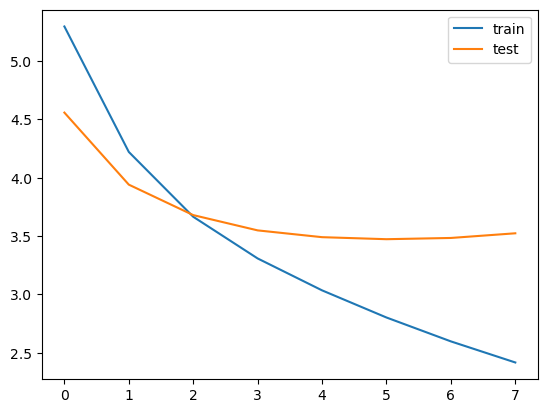

In [288]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [235]:
#테스트 단계: 실제 데이터로 복원해야 함

src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음


In [236]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [237]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(max_text_length, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [245]:
# 추론 단계
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sos']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c], verbose=0)
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eos'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eos'  or len(decoded_sentence.split()) >= (max_headlines_length-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [239]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + tar_index_to_word[i]+' '
    return temp

In [289]:
for i in range(50, 60):
    print("원문 :", seq2text(pre_encoder_input_test[i]))
    print("실제 요약 :", seq2summary(pre_decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(pre_encoder_input_test[i].reshape(1, max_text_length)))
    print("\n")

원문 : chrome extension called claims content considered homophobic racist sexist violent sexually violent users extension analyses content every website user visits offensive language however users also option reveal hidden content clicking blurred text 
실제 요약 : sos chrome extension out offensive language on internet 
1/1 [==============================] - 0s 28ms/step
예측 요약 :  news anchor slams news of sexual harassment by news anchor


원문 : india defeated sri lanka wickets take lead five match odi series sunday chasing sri lanka indian opener shikhar dhawan scored fastest odi hundred balls also fastest hundred indian sri lanka sri lanka captain virat kohli scored th odi fifty 
실제 요약 : india beat sri lanka in st odi to take series lead 
1/1 [==============================] - 0s 25ms/step
예측 요약 :  india beat sl by runs in their th odi series


원문 : first teaser upcoming psychological horror thriller film mother starring oscar winning actress jennifer lawrence released film also stars ja

In [323]:
str(indexed_data_test[51])
print(type(indexed_data_test[51]))  # np.ndarray인지 확인


<class 'numpy.ndarray'>


In [342]:
import numpy as np
from summa.summarizer import summarize

# Step 1: filtered_data를 Numpy 배열로 변환 (dtype=str 설정)
indexed_data = np.array(temp_data, dtype=object)  # dtype=object로 설정하여 리스트 내부 요소 유지

# Step 2: 동일한 indices로 데이터 셔플
indexed_data = indexed_data[indices]

# Step 3: 훈련 / 테스트 분리 (n_of_val 기준으로 적용)
indexed_data_train = indexed_data[:-n_of_val]  # 훈련 데이터 (원본 문장)
indexed_data_test = indexed_data[-n_of_val:]  # 테스트 데이터 (원본 문장)

# Step 4: 50~59번째 샘플 선택하여 Summa Summarizer 적용
start_idx = 50
end_idx = 60

for i in range(start_idx, end_idx):
    # 원본 텍스트 변환 (리스트라면 문자열로 합침)
    original_text = " ".join(indexed_data_test[i]) if isinstance(indexed_data_test[i], (list, np.ndarray)) else str(indexed_data_test[i])

    actual_summary = seq2summary(pre_decoder_input_test[i])  # 실제 요약 (Ground Truth)
    predicted_summary = decode_sequence(pre_encoder_input_test[i].reshape(1, max_text_length))  # Seq2Seq 모델 예측 요약

    # Summa Summarizer로 추출적 요약 수행
    summa_summary = summarize(original_text, words=20)

    print(f"원문 {i}: {original_text}")
    print(f"실제 요약: {actual_summary}")
    print(f"예측 요약(Seq2Seq): {predicted_summary}")
    print(f"추출적 요약(Summa): {summa_summary}")
    print("\n" + "="*100 + "\n")


1/1 [==============================] - 0s 26ms/step
원문 50: Chrome extension blurs out 'offensive' language on internet A Chrome extension called 'Soothe' claims to blur out content that is considered homophobic, racist, sexist, transphobic, violent, and sexually violent by its users. The extension analyses the content of every website the user visits to blur out the 'offensive' language. However, users also have the option to reveal hidden content by clicking on the blurred text.
실제 요약: sos chrome extension out offensive language on internet 
예측 요약(Seq2Seq):  news anchor slams news of sexual harassment by news anchor
추출적 요약(Summa): The extension analyses the content of every website the user visits to blur out the 'offensive' language.


1/1 [==============================] - 0s 35ms/step
원문 51: India beat Sri Lanka in 1st ODI to take 1-0 series lead India defeated Sri Lanka by 9 wickets to take a 1-0 lead in the five-match ODI series at Dambulla on Sunday. While chasing Sri Lanka's 21

코드 중간중간에 마크다운으로 회고를 작성해놨음

1. 일단 additive attention은 실패인 것 같지..? loss가 3 이하로 낮아지는 건 되게 쉽지 않다. 전처리가 더 중요한걸까 라기에는 이상치는 제거했고, 텍스트를 수정하는 게 옳다고는 안보이고... 뭐 그 사전 사이즈나 이런 것들을 더 바꿔볼 수는 있겠다
2. mask_zero=True 옵션에 대해서 새로 알게됐는데, 이게 이제 패딩의 0을 연산에 포함시키지 않도록 하는 메서드인데 저걸 키면 성능이 꽤 올라가는 대신에 (loss가 4점대에서 3점대 초반까지 하락), gpu 병렬 연산이 힘들도록 하는 문제 때문에 거의 10배 수준까지 학습속도가 나빠져버림... 처음에는 어느 부분에서 학습속도가 매우 떨어지는지 몰랐는데, 이친구였던 것 같음. 커뮤니티에서도 이 문제를 보고한 글들이 많았다
3. 프리패딩을 기준으로 했는데, 포스트 패딩의 경우는 성능이 더 빨리 나빠지는 것 같다.
4. 그리고 summa의 경우 텍스트 길이가 30글자 정도로 적어서 그럴까 요약본 형성을 실패하는 경우가 더러 있음.

In [345]:
pd.read_csv("C:/Users/양자/Desktop/Hun_Works/AIFFEL_quest_rs/Exploration/ex06/extractive_vs_abstractive_comparison.csv")

,원문 ID,실제 요약 (Ground Truth),"예측 요약 (Seq2Seq, Abstractive)","추출적 요약 (Summa, Extractive)",문법 완성도 (Seq2Seq),핵심 단어 포함 (Seq2Seq)
0,50,sos chrome extension out offensive language on...,news anchor slams news of sexual harassment by...,The extension analyses the content of every we...,🔴 문장 중복 및 의미 불명확,🔴 핵심 단어 누락 ('Chrome extension' 없음)
1,51,india beat sri lanka in st odi to take series ...,india beat sl by runs in their th odi series,"While chasing Sri Lanka's 216, Indian opener S...",✅ 적절 (완전한 문장),🔴 핵심 단어 누락 ('series lead' 없음)
2,52,sos teaser of jennifer starrer mother released,teaser of ryan reynolds starrer deadpool seque...,Teaser of Jennifer Lawrence starrer 'Mother!' ...,✅ 적절 (완전한 문장),"🔴 핵심 단어 오류 ('Ryan Reynolds, Deadpool' 원문에 없음)"
